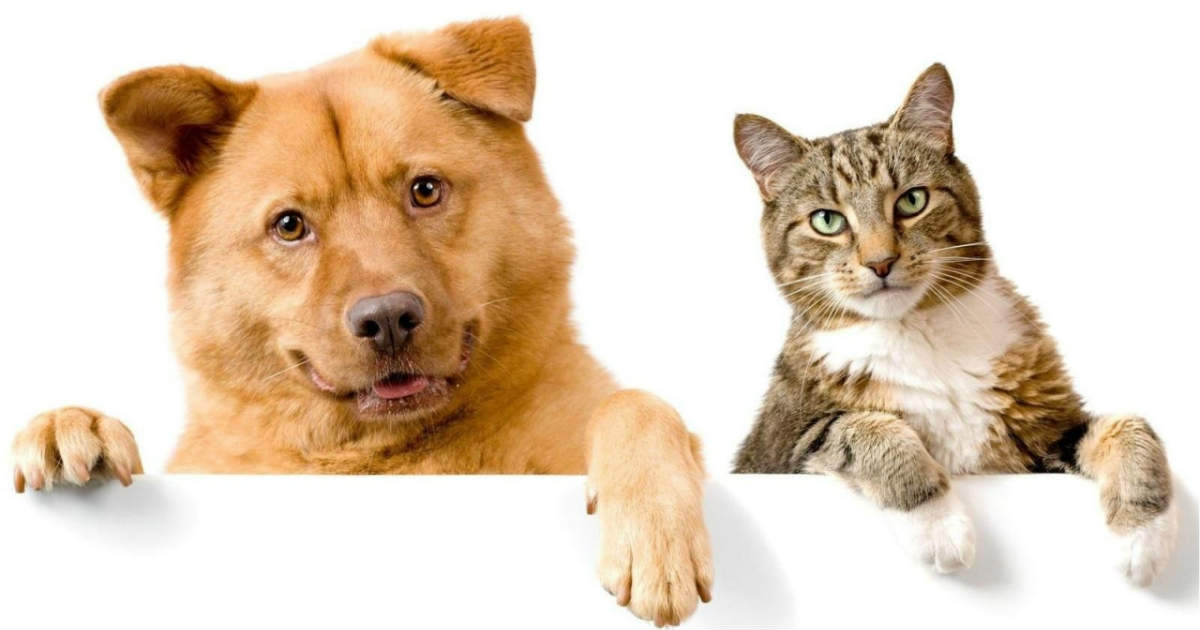

# Dog vs. Cat Classification

In [1]:
import shutil
import os
import warnings
warnings.filterwarnings('ignore')

# Set the paths
source_path = 'kaggle.json'  # Assuming kaggle.json is in the same directory as the notebook
destination_path = os.path.join(os.path.expanduser('~'), '.kaggle', 'kaggle.json')

# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Copy kaggle.json to the .kaggle directory
shutil.copyfile(source_path, destination_path)

# Set appropriate permissions for the file
os.chmod(destination_path, 0o600)


In [2]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E00A-422D

 Directory of C:\Users\ZMZM\Desktop\Jupyter Note\Cat vs. Dog Classification

12/25/2023  05:35 PM    <DIR>          .
12/25/2023  05:35 PM    <DIR>          ..
12/12/2023  11:00 PM    <DIR>          .ipynb_checkpoints
12/25/2023  05:34 PM         2,669,225 Dog vs. Cat Classification using Transfer Learning.ipynb
12/11/2019  04:19 AM       851,576,689 dogs-vs-cats.zip
12/12/2023  10:58 PM                70 kaggle.json
12/25/2023  05:33 PM            88,903 sampleSubmission.csv
12/25/2023  05:33 PM       284,321,224 test1.zip
12/12/2023  11:27 PM    <DIR>          train
12/25/2023  05:33 PM       569,546,721 train.zip
               6 File(s)  1,708,202,832 bytes
               4 Dir(s)  78,205,390,848 bytes free


In [4]:
from zipfile import ZipFile

df = 'dogs-vs-cats.zip'

with ZipFile(df, 'r') as zip:
    zip.extractall()
    print('Extracted Done')

Extracted Done


In [5]:
from zipfile import ZipFile

df = 'train.zip'

with ZipFile(df, 'r') as zip:
    zip.extractall()
    print('Extracted Done')

Extracted Done


In [6]:
import os

path, dirs, files = next(os.walk('train'))

file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


In [7]:
# Printing the name of images

file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imshow

### # Displaying the images of dogs and cats

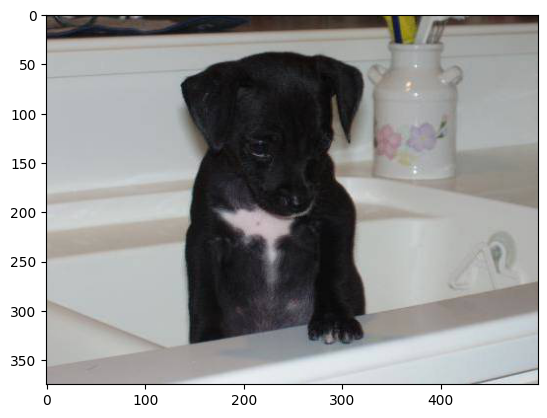

In [9]:
# Display dog images
dog_img = mpimg.imread('train/dog.8298.jpg')
plt.imshow(dog_img)

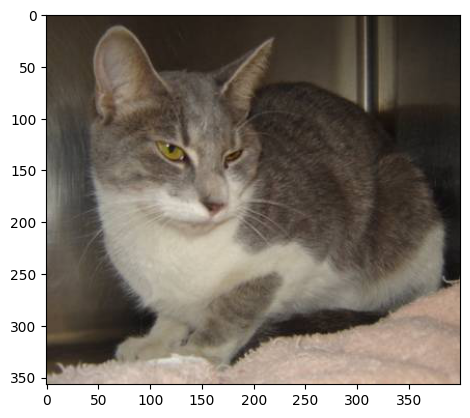

In [10]:
# Display cat images
cat_img = mpimg.imread('train/cat.4352.jpg')
plt.imshow(cat_img)

In [11]:
file_names = os.listdir('train')

for i in range(5):
    
    name = file_names[i]
    print(name[0:3])
    
    

cat
cat
cat
cat
cat


In [12]:
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for i in file_names:
    
    name = i[0:3]
    
    if name == 'dog':
        dog_count += 1
        
    else:
        cat_count += 1
        
print('Number of dogs images =', dog_count)
print('Number of cats images =', cat_count)


Number of dogs images = 12500
Number of cats images = 12500


### Resizing All Images

In [13]:
import random

original_folder = 'train/'  # Original folder
resized_folder = 'images_resized/'  # New resized folder (empty folder)

# Create the resized_folder if it doesn't exist
if not os.path.exists(resized_folder):
    os.mkdir(resized_folder)

# Get list of filenames from original_folder
filenames = os.listdir(original_folder)
random.shuffle(filenames)  # Shuffle the list of filenames

# Loop through the first 2000 shuffled images
for i in range(2000):
    filename = filenames[i]
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = os.path.join(resized_folder, filename)
    img.save(newImgPath)


In [14]:
file_names = os.listdir('images_resized')

dog_count = 0
cat_count = 0

for i in file_names:
    
    name = i[0:3]
    
    if name == 'dog':
        dog_count += 1
        
    else:
        cat_count += 1
        
print('Number of dogs images =', dog_count)
print('Number of cats images =', cat_count)


Number of dogs images = 984
Number of cats images = 1016


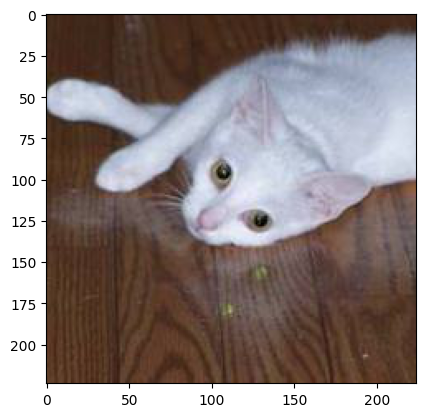

In [15]:
# display resized cat image
img = mpimg.imread('images_resized/cat.322.jpg')
imgplt = plt.imshow(img)
plt.show()

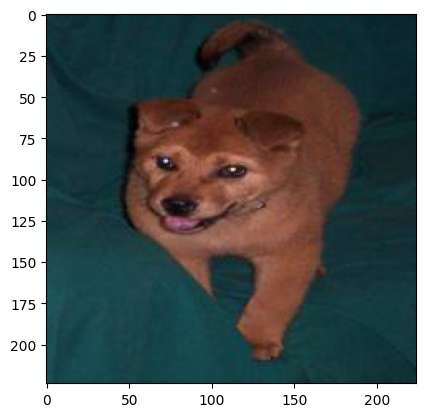

In [17]:
# display resized dog image
img = mpimg.imread('images_resized/dog.5442.jpg')
imgplt = plt.imshow(img)
plt.show()

### Creating labels for resized images of dogs and cats

#### Cat ➡ 0
#### Dog ➡ 1

In [18]:
# creaing a for loop to assign labels
filenames = os.listdir('images_resized/')

labels = []

for x in range(2000):

  file_name = filenames[x]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [19]:
print(labels[1020:1030])
print(len(labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2000


### Counting the images of dogs and cats out of 2000 images

In [20]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1016  984]


### Convert all the resized images to numpy arrays

In [21]:
import cv2
import glob

In [22]:
image_directory = 'images_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dog_cat_images)

[[[[216 222 221]
   [217 223 222]
   [219 224 223]
   ...
   [241 236 235]
   [247 239 239]
   [255 247 247]]

  [[214 220 219]
   [217 223 222]
   [220 225 224]
   ...
   [243 238 237]
   [247 239 239]
   [252 244 244]]

  [[214 220 219]
   [217 223 222]
   [221 226 225]
   ...
   [244 239 238]
   [246 238 238]
   [248 240 240]]

  ...

  [[218 213 214]
   [216 214 214]
   [212 212 212]
   ...
   [209 212 217]
   [208 212 217]
   [207 210 218]]

  [[219 214 215]
   [218 216 216]
   [211 213 214]
   ...
   [209 212 217]
   [208 212 217]
   [207 210 218]]

  [[214 211 213]
   [214 213 215]
   [209 211 212]
   ...
   [209 212 217]
   [207 211 216]
   [207 210 218]]]


 [[[ 71 121 141]
   [ 70 120 140]
   [ 68 118 140]
   ...
   [186 160 214]
   [186 160 214]
   [186 160 214]]

  [[ 69 119 139]
   [ 67 117 137]
   [ 64 114 136]
   ...
   [186 160 214]
   [186 160 214]
   [186 160 214]]

  [[ 67 117 137]
   [ 65 115 135]
   [ 61 111 133]
   ...
   [184 160 214]
   [184 160 214]
   [184 160

In [24]:
type(dog_cat_images)

numpy.ndarray

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [26]:
X = dog_cat_images
y = np.asarray(labels) 

### Train Test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


### Scaling the data

In [29]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
print(X_train_scaled)

[[[[0.17254902 0.17647059 0.16862745]
   [0.16078431 0.16470588 0.15686275]
   [0.1372549  0.12941176 0.1254902 ]
   ...
   [0.18431373 0.26666667 0.47058824]
   [0.20392157 0.27058824 0.4627451 ]
   [0.18823529 0.25098039 0.43529412]]

  [[0.17254902 0.17647059 0.16862745]
   [0.16078431 0.16470588 0.15686275]
   [0.14117647 0.13333333 0.12941176]
   ...
   [0.18823529 0.27058824 0.4745098 ]
   [0.20392157 0.27058824 0.4627451 ]
   [0.18823529 0.25098039 0.43529412]]

  [[0.17647059 0.18039216 0.17254902]
   [0.16470588 0.16862745 0.16078431]
   [0.14117647 0.13333333 0.12941176]
   ...
   [0.19215686 0.2745098  0.4745098 ]
   [0.20392157 0.2745098  0.45882353]
   [0.19215686 0.25490196 0.43529412]]

  ...

  [[0.06666667 0.04705882 0.03529412]
   [0.06666667 0.04705882 0.03529412]
   [0.06666667 0.04705882 0.03529412]
   ...
   [0.16470588 0.24313725 0.42745098]
   [0.13333333 0.23921569 0.45882353]
   [0.12156863 0.24313725 0.48235294]]

  [[0.0627451  0.04313725 0.03137255]
   [0.0

### Building the Neural Network System

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
mobileNet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobileNet_model, input_shape=(224,224,3), trainable=False)

In [33]:
num_of_classes= 2     #cat & dog

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [35]:
model.fit(X_train_scaled, y_train, epochs=8)

Epoch 1/8



50/50 [==============================] - 18s 230ms/step - loss: 0.2030 - acc: 0.9187
Epoch 2/8
50/50 [==============================] - 12s 231ms/step - loss: 0.0661 - acc: 0.9812
Epoch 3/8
50/50 [==============================] - 12s 240ms/step - loss: 0.0488 - acc: 0.9862
Epoch 4/8
50/50 [==============================] - 12s 237ms/step - loss: 0.0395 - acc: 0.9906
Epoch 5/8
50/50 [==============================] - 12s 239ms/step - loss: 0.0321 - acc: 0.9925
Epoch 6/8
50/50 [==============================] - 12s 237ms/step - loss: 0.0283 - acc: 0.9931
Epoch 7/8
50/50 [==============================] - 12s 237ms/step - loss: 0.0231 - acc: 0.9975
Epoch 8/8
50/50 [==============================] - 12s 237ms/step - loss: 0.0204 - acc: 0.9962


In [36]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 4s 221ms/step - loss: 0.0557 - acc: 0.9825
Test Loss = 0.055703822523355484
Test Accuracy = 0.9825000166893005


### Predictive System

Path of the image to be predicted: C:/Users/ZMZM/Desktop/A.jpg


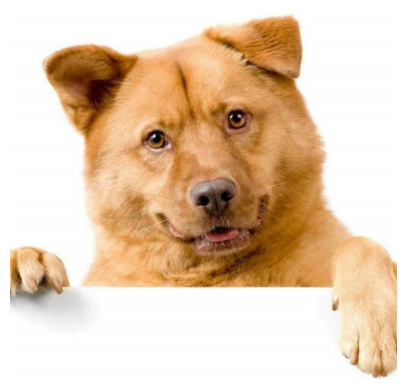

1/1 [==============================] - 0s 31ms/step
[[-0.748303   1.3828213]]
1
The image represents a Dog


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: C:/Users/ZMZM/Desktop/B.jpg


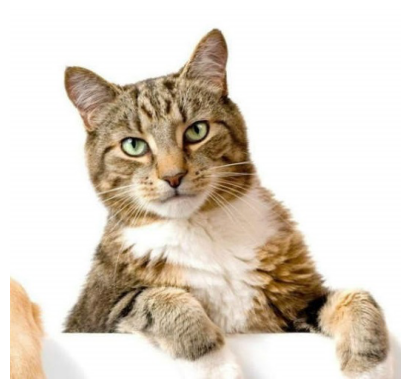

1/1 [==============================] - 0s 44ms/step
[[ 6.623502  -4.6004148]]
0
The image represents a Cat


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

#

# Regards, Tariq Ibrahim